In [69]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm


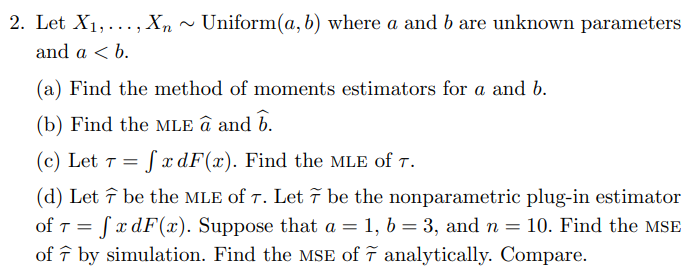

In [11]:
n = 10
b = 3
a = 1

X = np.random.uniform(low = a, high = b, size = n)
bhat = np.max(X)
ahat = np.min(X)

tauhat = (bhat + ahat) / 2

tautwiddle = np.mean(X)

print("MLE estimate = ", tauhat)
print("Non-parametric estimate = ", tautwiddle)

MLE estimate =  2.0059955819488575
Non-parametric estimate =  1.9234924529743662


In [12]:
B = 1000

XBoot = np.random.choice(X, size = (n, B))

bBoot = np.max(XBoot, axis = 0)
aBoot = np.min(XBoot, axis = 0)

tauhatBoot = (bBoot + aBoot)/2
tautwiddleBoot = np.mean(XBoot, axis = 0)

hatse = np.std(tauhatBoot)
twiddlese = np.std(tautwiddleBoot)

print("MLE se = ", hatse)
print("Non-parametric se = ", twiddlese)


MLE se =  0.15224233710966267
Non-parametric se =  0.21170489430980444


In [14]:
print(np.sqrt((b - a) ** 2 / (12 * n)))

0.18257418583505536


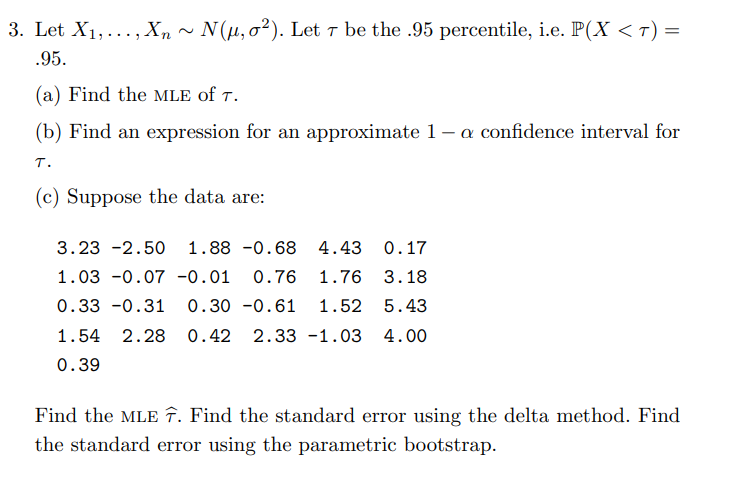

In [38]:
X = np.array([3.23, -2.5, 1.88, -0.68, 4.43, 0.17, 1.03, -0.07, -0.01, 0.76, 1.76, 3.18, 0.33, -0.31, 0.3, -0.61, 1.52, 5.43, 1.54, 2.28, 0.42, 2.33, -1.03, 4, 0.39])
n = len(X)

muhat = np.mean(X)
print("mu estimate = ", muhat)
sigmahat = np.std(X)
print("sigma estimate = ", sigmahat)

tauhat = norm.ppf(0.95) * sigmahat + muhat
print("tauhat = ", tauhat)

mu estimate =  1.1908
sigma estimate =  1.817554224775701
tauhat =  4.180410658803283


In [41]:
se_delta = np.sqrt((norm.ppf(0.95) ** 2 * sigmahat ** 2 / (2 * n) + sigmahat **2 / (n)))

print("delta method se = ", se_delta)

C_delta = (tauhat + norm.ppf(0.025) * se_delta, tauhat + norm.ppf(0.975) * se_delta)
print("Confidence interval = ", C_delta)

delta method se =  0.5575801038636548
Confidence interval =  (3.087573736734417, 5.273247580872149)


In [42]:
B = 1000
XBoot = norm.rvs(loc = muhat, scale = sigmahat, size = (n, B))

muBoot = np.mean(XBoot, axis=0)
sigmaBoot = np.std(XBoot, axis=0)

tauBoot = norm.ppf(0.95) * sigmaBoot + muBoot

se_Boot = np.std(tauBoot)

print("Bootstrap se = ", se_Boot)

CBoot = (tauhat + se_Boot * norm.ppf(0.025), tauhat + se_Boot * norm.ppf(0.975))

print("Confidence interval = ", CBoot)

Bootstrap se =  0.5468887133108441
Confidence interval =  (3.1085284771625776, 5.252292840443989)


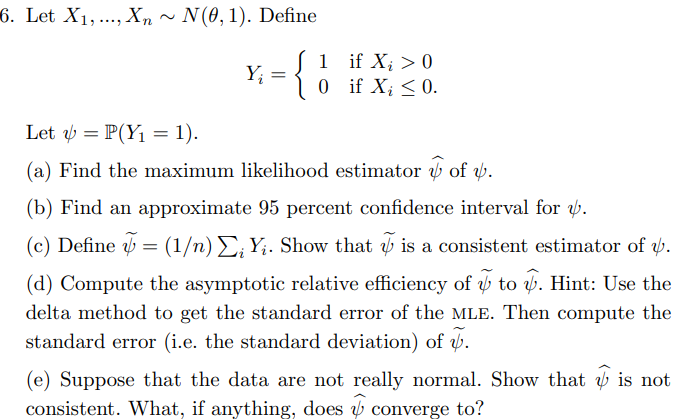

In [32]:
n1 = 200
n2 = 200

X1 = 160
X2 = 148

p1hat = X1 / n1
p2hat = X2 / n2

psihat = p1hat - p2hat

print("psi estimate = ", psihat)

psi estimate =  0.06000000000000005


In [33]:
alpha = 0.1

deltase = np.sqrt(p1hat * (1 - p1hat) / n1 + p2hat * (1 - p2hat) / n2)
print("delta se = ", deltase)

deltaC = (psihat + norm.ppf(alpha / 2) * deltase, psihat + norm.ppf(1 - alpha / 2) * deltase)
print("confidence interval = ", deltaC)

delta se =  0.04197618372363071
confidence interval =  (-0.009044678043395302, 0.12904467804339537)


In [44]:
from scipy.stats import binom

X1Boot = binom.rvs(n1, p1hat, size = B)
X2Boot = binom.rvs(n2, p2hat, size = B)

p1Boot = X1Boot / n1
p2Boot = X2Boot / n2

psiBoot = p1Boot - p2Boot

bootse = np.std(psiBoot)
print("Bootstrap se = ", bootse)

bootC = (psihat + bootse * norm.ppf(alpha / 2), psihat + bootse * norm.ppf(1 - alpha / 2))
print("confidence interval = ", bootC)

Bootstrap se =  0.042807351880255334
confidence interval =  (-0.01041182800042588, 0.13041182800042594)


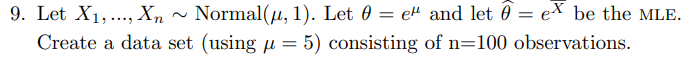
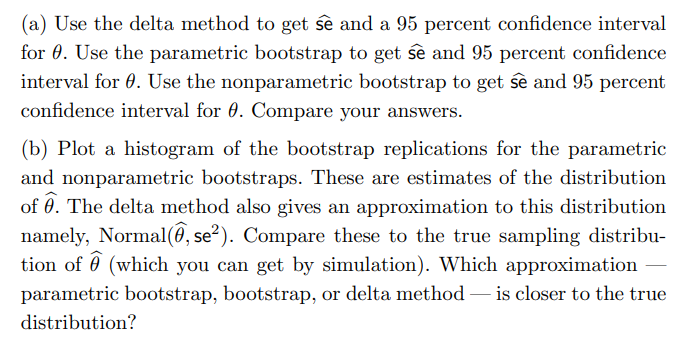

In [53]:
print("true theta = ", np.exp(5))

true theta =  148.4131591025766


In [84]:
n = 100
mu = 5

X = norm.rvs(loc=mu, size=n)
muhat = np.mean(X)
thetahat = np.exp(muhat)

print("thetahat = ", thetahat)

thetahat =  152.8674183303021


In [85]:
alpha = 0.05

deltase = np.exp(muhat) / np.sqrt(n)
print("delta se = ", deltase)

deltaC = (thetahat + norm.ppf(alpha/2) * deltase, thetahat + norm.ppf(1 - alpha/2) * deltase)
print("confidence interval = ", deltaC)

delta se =  15.28674183303021
confidence interval =  (122.90595489660106, 182.8288817640031)


In [86]:
B = 1000

pBootX = norm.rvs(loc=muhat, scale=1, size=(n, B))

pBootmu = np.mean(pBootX, axis=0)
pBoottheta = np.exp(pBootmu)

pBootse = np.std(pBoottheta)
print("Parametric Bootstrap se = ", pBootse)
pBootC = (thetahat + norm.ppf(alpha/2) * pBootse, thetahat + norm.ppf(1 - alpha/2) * pBootse)
print("confidence interval = ", pBootC)

Parametric Bootstrap se =  15.34335781798227
confidence interval =  (122.79498960514576, 182.93984705545842)


In [87]:
BootX = np.random.choice(X, size = (n, B))

Bootmu = np.mean(BootX, axis = 0)
Boottheta = np.exp(Bootmu)


Bootse = np.std(Boottheta)
print("Parametric Bootstrap se = ", Bootse)
BootC = (thetahat + norm.ppf(alpha/2) * Bootse, thetahat + norm.ppf(1 - alpha/2) * Bootse)
print("confidence interval = ", BootC)

Parametric Bootstrap se =  15.142498620637696
confidence interval =  (123.18866639790475, 182.5461702626994)


[]

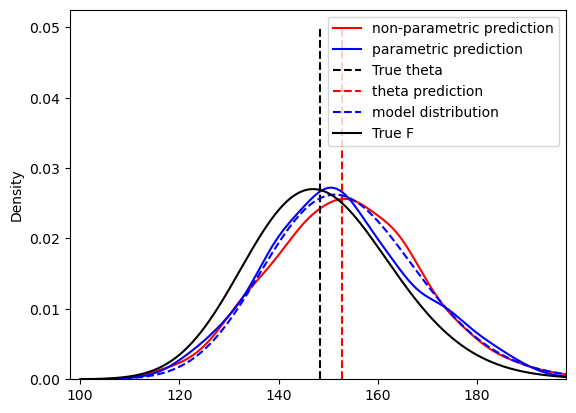

In [92]:

#sns.histplot(Boottheta, stat = 'density', bins = 70, color = 'red')
sns.kdeplot(Boottheta, label = 'non-parametric prediction', color = 'red')

#sns.histplot(pBoottheta, stat = 'density', bins = 70, color='blue')
sns.kdeplot(pBoottheta, label = 'parametric prediction', color = 'blue')

plt.vlines(np.exp(5),0, 0.05,linestyles= '--', color = 'k', label = 'True theta')
plt.vlines(thetahat,0, 0.05,linestyles= '--', color = 'red', label = 'theta prediction')
xtrue = np.linspace(100, 220, 10000)
ytrue = norm.pdf(np.log(xtrue), loc=mu, scale = np.sqrt(1/n)) / xtrue

yparametric = norm.pdf(np.log(xtrue), loc = muhat, scale = np.sqrt(1/n)) / xtrue
#ytrue2 = norm.pdf(np.log(xtrue), loc=mu, scale = np.sqrt(1/n)) / xtrue
plt.plot(xtrue, yparametric, label = 'model distribution', color = 'blue', linestyle='--')
plt.plot(xtrue, ytrue, label = 'True F', color = 'k')

plt.legend()
plt.xlim([148-500/np.sqrt(n), 148+500/np.sqrt(n)])
plt.plot()

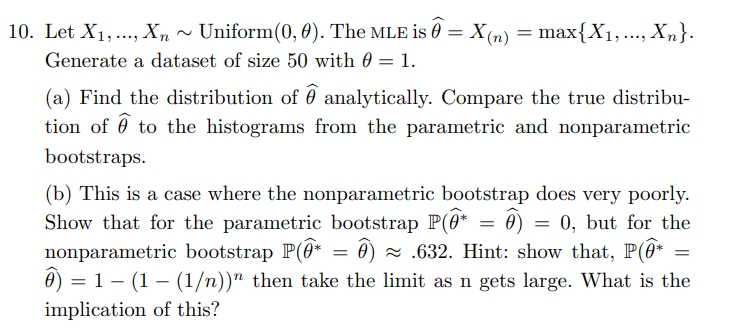

In [93]:
n = 50
theta = 1
X = np.random.uniform(low=0, high=theta, size=n)

thetahat = np.max(X)
print("theta estimate = ", thetahat)

theta estimate =  0.9998292584090037


In [94]:
B = 1000
BootX = np.random.choice(X, size = (n, B))
Boottheta = np.max(BootX, axis=0)

pBootX = np.random.uniform(low=0, high=thetahat, size=(n, B))
pBoottheta = np.max(pBootX, axis=0)

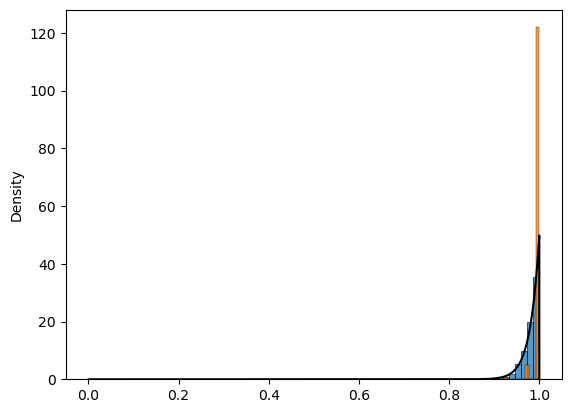

In [102]:
truex=np.linspace(0, theta, 10000)
truey = (n * (truex ** (n-1)) / (theta ** n)) * (truex < 1)
plt.plot(truex, truey, label = 'true', color='k')

sns.histplot(pBoottheta, stat = 'density', bins = 10)
sns.histplot(Boottheta, stat = 'density', bins = 10)
plt.show()